### Import Libraries

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import load_data
import model
import training
import utils

### Creating training and test Data using Data Loaders

In [2]:
train_loader,test_loader = load_data.cifar10_train_test_data()

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


### Data Visualization
let's have a look at some of the images the CIFAR10 data set

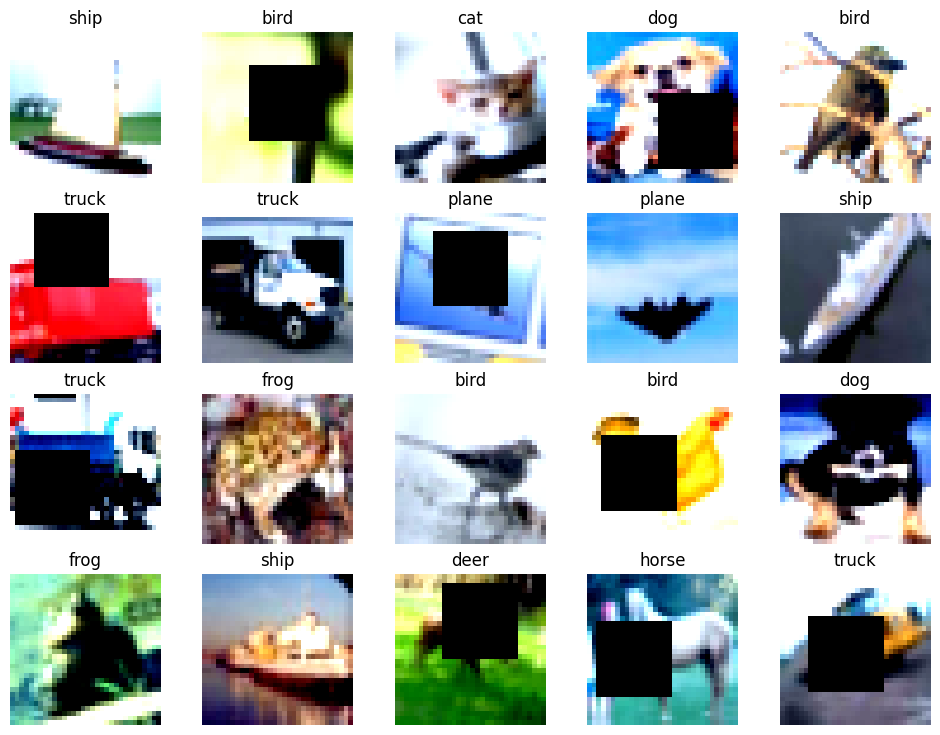

In [3]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

cols = 5
rows = 4
fig, axs = plt.subplots(rows, cols, figsize=(12, 9))
counter= 0
rnd_idx = list(range(20))
for x in range(rows):
  for y in range(cols):
    axs[x, y].set_title(classes[labels[rnd_idx[counter]]])
    axs[x, y].imshow(utils.imshow_(images[counter]))
    axs[x, y].set_axis_off()
    counter+=1

plt.show()

### Loading our CNN Model and Summarizing the Params

In [5]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 34, 34]           3,456
              ReLU-2          [-1, 128, 34, 34]               0
       BatchNorm2d-3          [-1, 128, 34, 34]             256
           Dropout-4          [-1, 128, 34, 34]               0
            Conv2d-5          [-1, 128, 36, 36]           1,152
            Conv2d-6           [-1, 64, 36, 36]           8,192
              ReLU-7           [-1, 64, 36, 36]               0
       BatchNorm2d-8           [-1, 64, 36, 36]             128
           Dropout-9           [-1, 64, 36, 36]               0
           Conv2d-10           [-1, 32, 18, 18]          18,432
      BatchNorm2d-11           [-1, 32, 18, 18]              64
          Dropout-12           [-1, 32, 18, 18]               0
           Conv2d-13           [-1, 32, 20, 20]             288
           Conv2d-14          [-1,

### Let's Train and Test our model

In [6]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
train_losses = []
train_acc = []
test_losses = []
test_acc = []
EPOCHS = 121
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_loss , train_accuracy = training.train(model, device, train_loader, optimizer, epoch)
    test_loss , test_accuracy = training.test(model, device, test_loader)
    train_losses.extend(train_loss),train_acc.extend(train_accuracy)
    test_losses.extend(test_loss),test_acc.extend(test_accuracy)

EPOCH: 0


  0%|          | 0/98 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Loss=1.6759477853775024 Batch_id=97 Accuracy=26.54: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 1.6704, Accuracy: 3859/10000 (38.59%)

EPOCH: 1


Loss=1.5086228847503662 Batch_id=97 Accuracy=41.43: 100%|██████████| 98/98 [00:22<00:00,  4.39it/s]



Test set: Average loss: 1.5181, Accuracy: 4448/10000 (44.48%)

EPOCH: 2


Loss=1.3071801662445068 Batch_id=97 Accuracy=47.39: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]



Test set: Average loss: 1.3552, Accuracy: 5087/10000 (50.87%)

EPOCH: 3


Loss=1.2124245166778564 Batch_id=97 Accuracy=51.47: 100%|██████████| 98/98 [00:22<00:00,  4.37it/s]



Test set: Average loss: 1.2406, Accuracy: 5460/10000 (54.60%)

EPOCH: 4


Loss=1.2015764713287354 Batch_id=97 Accuracy=54.73: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 1.2578, Accuracy: 5539/10000 (55.39%)

EPOCH: 5


Loss=1.2201528549194336 Batch_id=97 Accuracy=57.11: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 1.1473, Accuracy: 5825/10000 (58.25%)

EPOCH: 6


Loss=1.044391393661499 Batch_id=97 Accuracy=58.79: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]



Test set: Average loss: 1.0974, Accuracy: 6088/10000 (60.88%)

EPOCH: 7


Loss=1.0274919271469116 Batch_id=97 Accuracy=61.04: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 1.0408, Accuracy: 6334/10000 (63.34%)

EPOCH: 8


Loss=1.079638123512268 Batch_id=97 Accuracy=62.38: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.9806, Accuracy: 6536/10000 (65.36%)

EPOCH: 9


Loss=0.9784290790557861 Batch_id=97 Accuracy=63.67: 100%|██████████| 98/98 [00:22<00:00,  4.37it/s]



Test set: Average loss: 0.9656, Accuracy: 6560/10000 (65.60%)

EPOCH: 10


Loss=1.0358457565307617 Batch_id=97 Accuracy=65.16: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.9518, Accuracy: 6640/10000 (66.40%)

EPOCH: 11


Loss=0.9550784826278687 Batch_id=97 Accuracy=66.03: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]



Test set: Average loss: 0.8721, Accuracy: 6878/10000 (68.78%)

EPOCH: 12


Loss=0.922383189201355 Batch_id=97 Accuracy=67.20: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]



Test set: Average loss: 0.8676, Accuracy: 6913/10000 (69.13%)

EPOCH: 13


Loss=0.867417573928833 Batch_id=97 Accuracy=68.00: 100%|██████████| 98/98 [00:22<00:00,  4.28it/s]



Test set: Average loss: 0.8946, Accuracy: 6872/10000 (68.72%)

EPOCH: 14


Loss=0.8597214818000793 Batch_id=97 Accuracy=68.68: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.8338, Accuracy: 7068/10000 (70.68%)

EPOCH: 15


Loss=0.8803960084915161 Batch_id=97 Accuracy=69.78: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]



Test set: Average loss: 0.8669, Accuracy: 6964/10000 (69.64%)

EPOCH: 16


Loss=0.7656888365745544 Batch_id=97 Accuracy=70.14: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]



Test set: Average loss: 0.7751, Accuracy: 7285/10000 (72.85%)

EPOCH: 17


Loss=0.809536874294281 Batch_id=97 Accuracy=70.92: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]



Test set: Average loss: 0.7630, Accuracy: 7317/10000 (73.17%)

EPOCH: 18


Loss=0.8315119743347168 Batch_id=97 Accuracy=71.61: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]



Test set: Average loss: 0.7672, Accuracy: 7325/10000 (73.25%)

EPOCH: 19


Loss=0.8601797819137573 Batch_id=97 Accuracy=72.08: 100%|██████████| 98/98 [00:22<00:00,  4.28it/s]



Test set: Average loss: 0.7279, Accuracy: 7484/10000 (74.84%)

EPOCH: 20


Loss=0.7264398336410522 Batch_id=97 Accuracy=72.62: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.7263, Accuracy: 7498/10000 (74.98%)

EPOCH: 21


Loss=0.7569827437400818 Batch_id=97 Accuracy=73.04: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.6798, Accuracy: 7625/10000 (76.25%)

EPOCH: 22


Loss=0.6903191804885864 Batch_id=97 Accuracy=73.65: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]



Test set: Average loss: 0.6839, Accuracy: 7670/10000 (76.70%)

EPOCH: 23


Loss=0.8067589998245239 Batch_id=97 Accuracy=74.26: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.6663, Accuracy: 7744/10000 (77.44%)

EPOCH: 24


Loss=0.66899174451828 Batch_id=97 Accuracy=74.43: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]



Test set: Average loss: 0.6505, Accuracy: 7807/10000 (78.07%)

EPOCH: 25


Loss=0.6552828550338745 Batch_id=97 Accuracy=75.06: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]



Test set: Average loss: 0.6654, Accuracy: 7724/10000 (77.24%)

EPOCH: 26


Loss=0.7257978916168213 Batch_id=97 Accuracy=75.35: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]



Test set: Average loss: 0.6940, Accuracy: 7651/10000 (76.51%)

EPOCH: 27


Loss=0.6717712879180908 Batch_id=97 Accuracy=76.26: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.6801, Accuracy: 7681/10000 (76.81%)

EPOCH: 28


Loss=0.5963684320449829 Batch_id=97 Accuracy=76.14: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]



Test set: Average loss: 0.6673, Accuracy: 7736/10000 (77.36%)

EPOCH: 29


Loss=0.6073868870735168 Batch_id=97 Accuracy=76.32: 100%|██████████| 98/98 [00:22<00:00,  4.28it/s]



Test set: Average loss: 0.6308, Accuracy: 7876/10000 (78.76%)

EPOCH: 30


Loss=0.676568865776062 Batch_id=97 Accuracy=76.67: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.6296, Accuracy: 7849/10000 (78.49%)

EPOCH: 31


Loss=0.7062352299690247 Batch_id=97 Accuracy=76.77: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]



Test set: Average loss: 0.5999, Accuracy: 7944/10000 (79.44%)

EPOCH: 32


Loss=0.6588597297668457 Batch_id=97 Accuracy=77.50: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.6089, Accuracy: 7923/10000 (79.23%)

EPOCH: 33


Loss=0.6082819700241089 Batch_id=97 Accuracy=77.06: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.6018, Accuracy: 7941/10000 (79.41%)

EPOCH: 34


Loss=0.6603699922561646 Batch_id=97 Accuracy=77.47: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.5907, Accuracy: 7994/10000 (79.94%)

EPOCH: 35


Loss=0.6898497343063354 Batch_id=97 Accuracy=77.94: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.6274, Accuracy: 7893/10000 (78.93%)

EPOCH: 36


Loss=0.6368191242218018 Batch_id=97 Accuracy=77.92: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.5803, Accuracy: 8048/10000 (80.48%)

EPOCH: 37


Loss=0.6225221157073975 Batch_id=97 Accuracy=78.13: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]



Test set: Average loss: 0.5914, Accuracy: 8014/10000 (80.14%)

EPOCH: 38


Loss=0.6707748770713806 Batch_id=97 Accuracy=78.42: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.5551, Accuracy: 8102/10000 (81.02%)

EPOCH: 39


Loss=0.5700889825820923 Batch_id=97 Accuracy=78.85: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.5865, Accuracy: 8020/10000 (80.20%)

EPOCH: 40


Loss=0.6980969905853271 Batch_id=97 Accuracy=78.80: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]



Test set: Average loss: 0.5664, Accuracy: 8074/10000 (80.74%)

EPOCH: 41


Loss=0.5899388194084167 Batch_id=97 Accuracy=79.16: 100%|██████████| 98/98 [00:23<00:00,  4.21it/s]



Test set: Average loss: 0.5861, Accuracy: 8018/10000 (80.18%)

EPOCH: 42


Loss=0.6106780171394348 Batch_id=97 Accuracy=79.41: 100%|██████████| 98/98 [00:22<00:00,  4.30it/s]



Test set: Average loss: 0.5403, Accuracy: 8192/10000 (81.92%)

EPOCH: 43


Loss=0.6944620013237 Batch_id=97 Accuracy=79.42: 100%|██████████| 98/98 [00:22<00:00,  4.28it/s]



Test set: Average loss: 0.5703, Accuracy: 8068/10000 (80.68%)

EPOCH: 44


Loss=0.7150722146034241 Batch_id=97 Accuracy=79.42: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]



Test set: Average loss: 0.5416, Accuracy: 8185/10000 (81.85%)

EPOCH: 45


Loss=0.6039984226226807 Batch_id=97 Accuracy=79.57: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]



Test set: Average loss: 0.5571, Accuracy: 8101/10000 (81.01%)

EPOCH: 46


Loss=0.5455436706542969 Batch_id=97 Accuracy=80.01: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.5619, Accuracy: 8113/10000 (81.13%)

EPOCH: 47


Loss=0.5530222654342651 Batch_id=97 Accuracy=80.27: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]



Test set: Average loss: 0.5548, Accuracy: 8171/10000 (81.71%)

EPOCH: 48


Loss=0.5526221394538879 Batch_id=97 Accuracy=80.34: 100%|██████████| 98/98 [00:22<00:00,  4.28it/s]



Test set: Average loss: 0.5266, Accuracy: 8219/10000 (82.19%)

EPOCH: 49


Loss=0.6091122031211853 Batch_id=97 Accuracy=80.17: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.5247, Accuracy: 8201/10000 (82.01%)

EPOCH: 50


Loss=0.604286789894104 Batch_id=97 Accuracy=80.60: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]



Test set: Average loss: 0.5457, Accuracy: 8151/10000 (81.51%)

EPOCH: 51


Loss=0.530721127986908 Batch_id=97 Accuracy=80.96: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]



Test set: Average loss: 0.6274, Accuracy: 7937/10000 (79.37%)

EPOCH: 52


Loss=0.557353675365448 Batch_id=97 Accuracy=81.13: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]



Test set: Average loss: 0.5328, Accuracy: 8215/10000 (82.15%)

EPOCH: 53


Loss=0.5755714774131775 Batch_id=97 Accuracy=81.27: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.5099, Accuracy: 8286/10000 (82.86%)

EPOCH: 54


Loss=0.5130887031555176 Batch_id=97 Accuracy=81.12: 100%|██████████| 98/98 [00:23<00:00,  4.24it/s]



Test set: Average loss: 0.5225, Accuracy: 8263/10000 (82.63%)

EPOCH: 55


Loss=0.44353777170181274 Batch_id=97 Accuracy=81.27: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]



Test set: Average loss: 0.5406, Accuracy: 8202/10000 (82.02%)

EPOCH: 56


Loss=0.49394431710243225 Batch_id=97 Accuracy=81.58: 100%|██████████| 98/98 [00:22<00:00,  4.30it/s]



Test set: Average loss: 0.5352, Accuracy: 8225/10000 (82.25%)

EPOCH: 57


Loss=0.5471504926681519 Batch_id=97 Accuracy=81.57: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]



Test set: Average loss: 0.5242, Accuracy: 8272/10000 (82.72%)

EPOCH: 58


Loss=0.5593963265419006 Batch_id=97 Accuracy=81.70: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.5112, Accuracy: 8275/10000 (82.75%)

EPOCH: 59


Loss=0.46915870904922485 Batch_id=97 Accuracy=81.78: 100%|██████████| 98/98 [00:22<00:00,  4.30it/s]



Test set: Average loss: 0.4945, Accuracy: 8326/10000 (83.26%)

EPOCH: 60


Loss=0.4542037844657898 Batch_id=97 Accuracy=82.11: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]



Test set: Average loss: 0.5072, Accuracy: 8291/10000 (82.91%)

EPOCH: 61


Loss=0.4693950414657593 Batch_id=97 Accuracy=81.97: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.5027, Accuracy: 8339/10000 (83.39%)

EPOCH: 62


Loss=0.4940794110298157 Batch_id=97 Accuracy=82.07: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.5187, Accuracy: 8264/10000 (82.64%)

EPOCH: 63


Loss=0.511946976184845 Batch_id=97 Accuracy=82.18: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.5231, Accuracy: 8242/10000 (82.42%)

EPOCH: 64


Loss=0.5300515294075012 Batch_id=97 Accuracy=82.30: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.5144, Accuracy: 8258/10000 (82.58%)

EPOCH: 65


Loss=0.5193744897842407 Batch_id=97 Accuracy=82.38: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.5377, Accuracy: 8182/10000 (81.82%)

EPOCH: 66


Loss=0.49232974648475647 Batch_id=97 Accuracy=82.43: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]



Test set: Average loss: 0.5137, Accuracy: 8322/10000 (83.22%)

EPOCH: 67


Loss=0.5054553151130676 Batch_id=97 Accuracy=82.47: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]



Test set: Average loss: 0.5141, Accuracy: 8328/10000 (83.28%)

EPOCH: 68


Loss=0.4891015887260437 Batch_id=97 Accuracy=82.57: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.4970, Accuracy: 8325/10000 (83.25%)

EPOCH: 69


Loss=0.4580997824668884 Batch_id=97 Accuracy=83.07: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.5093, Accuracy: 8295/10000 (82.95%)

EPOCH: 70


Loss=0.419045090675354 Batch_id=97 Accuracy=82.75: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.4943, Accuracy: 8342/10000 (83.42%)

EPOCH: 71


Loss=0.4992566704750061 Batch_id=97 Accuracy=82.96: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]



Test set: Average loss: 0.5045, Accuracy: 8314/10000 (83.14%)

EPOCH: 72


Loss=0.5081639289855957 Batch_id=97 Accuracy=83.09: 100%|██████████| 98/98 [00:22<00:00,  4.30it/s]



Test set: Average loss: 0.4897, Accuracy: 8367/10000 (83.67%)

EPOCH: 73


Loss=0.43206068873405457 Batch_id=97 Accuracy=82.82: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.4774, Accuracy: 8402/10000 (84.02%)

EPOCH: 74


Loss=0.47002989053726196 Batch_id=97 Accuracy=83.35: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.5043, Accuracy: 8317/10000 (83.17%)

EPOCH: 75


Loss=0.533879280090332 Batch_id=97 Accuracy=83.44: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.5198, Accuracy: 8254/10000 (82.54%)

EPOCH: 76


Loss=0.4727672338485718 Batch_id=97 Accuracy=83.08: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]



Test set: Average loss: 0.4803, Accuracy: 8384/10000 (83.84%)

EPOCH: 77


Loss=0.46186965703964233 Batch_id=97 Accuracy=83.57: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]



Test set: Average loss: 0.4969, Accuracy: 8384/10000 (83.84%)

EPOCH: 78


Loss=0.44770416617393494 Batch_id=97 Accuracy=83.39: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.4942, Accuracy: 8383/10000 (83.83%)

EPOCH: 79


Loss=0.5091321468353271 Batch_id=97 Accuracy=83.58: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.4756, Accuracy: 8414/10000 (84.14%)

EPOCH: 80


Loss=0.4736570715904236 Batch_id=97 Accuracy=83.82: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.5040, Accuracy: 8342/10000 (83.42%)

EPOCH: 81


Loss=0.43773728609085083 Batch_id=97 Accuracy=83.82: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]



Test set: Average loss: 0.4917, Accuracy: 8372/10000 (83.72%)

EPOCH: 82


Loss=0.3961838185787201 Batch_id=97 Accuracy=83.81: 100%|██████████| 98/98 [00:22<00:00,  4.28it/s]



Test set: Average loss: 0.4739, Accuracy: 8430/10000 (84.30%)

EPOCH: 83


Loss=0.5224393010139465 Batch_id=97 Accuracy=83.66: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.4847, Accuracy: 8395/10000 (83.95%)

EPOCH: 84


Loss=0.4276234209537506 Batch_id=97 Accuracy=84.06: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.4796, Accuracy: 8437/10000 (84.37%)

EPOCH: 85


Loss=0.4527796804904938 Batch_id=97 Accuracy=84.21: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.4802, Accuracy: 8432/10000 (84.32%)

EPOCH: 86


Loss=0.4752562940120697 Batch_id=97 Accuracy=84.12: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.4727, Accuracy: 8446/10000 (84.46%)

EPOCH: 87


Loss=0.4579952657222748 Batch_id=97 Accuracy=83.99: 100%|██████████| 98/98 [00:23<00:00,  4.24it/s]



Test set: Average loss: 0.4957, Accuracy: 8347/10000 (83.47%)

EPOCH: 88


Loss=0.4448115825653076 Batch_id=97 Accuracy=84.42: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.4854, Accuracy: 8414/10000 (84.14%)

EPOCH: 89


Loss=0.391080766916275 Batch_id=97 Accuracy=84.23: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.4831, Accuracy: 8417/10000 (84.17%)

EPOCH: 90


Loss=0.3536374568939209 Batch_id=97 Accuracy=84.61: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.4682, Accuracy: 8461/10000 (84.61%)

EPOCH: 91


Loss=0.46653226017951965 Batch_id=97 Accuracy=84.36: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.4760, Accuracy: 8405/10000 (84.05%)

EPOCH: 92


Loss=0.5079003572463989 Batch_id=97 Accuracy=84.65: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.4902, Accuracy: 8393/10000 (83.93%)

EPOCH: 93


Loss=0.390511691570282 Batch_id=97 Accuracy=84.70: 100%|██████████| 98/98 [00:22<00:00,  4.28it/s]



Test set: Average loss: 0.5176, Accuracy: 8314/10000 (83.14%)

EPOCH: 94


Loss=0.500611424446106 Batch_id=97 Accuracy=84.67: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]



Test set: Average loss: 0.4893, Accuracy: 8374/10000 (83.74%)

EPOCH: 95


Loss=0.440256267786026 Batch_id=97 Accuracy=84.69: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.4672, Accuracy: 8425/10000 (84.25%)

EPOCH: 96


Loss=0.4857443869113922 Batch_id=97 Accuracy=84.82: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.4807, Accuracy: 8417/10000 (84.17%)

EPOCH: 97


Loss=0.4255894720554352 Batch_id=97 Accuracy=84.78: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]



Test set: Average loss: 0.4789, Accuracy: 8441/10000 (84.41%)

EPOCH: 98


Loss=0.33344459533691406 Batch_id=97 Accuracy=85.02: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]



Test set: Average loss: 0.4557, Accuracy: 8501/10000 (85.01%)

EPOCH: 99


Loss=0.4937214255332947 Batch_id=97 Accuracy=85.11: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.4853, Accuracy: 8431/10000 (84.31%)

EPOCH: 100


Loss=0.44651108980178833 Batch_id=97 Accuracy=84.95: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.4701, Accuracy: 8437/10000 (84.37%)

EPOCH: 101


Loss=0.47190648317337036 Batch_id=97 Accuracy=84.98: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.4623, Accuracy: 8466/10000 (84.66%)

EPOCH: 102


Loss=0.4636951982975006 Batch_id=97 Accuracy=85.14: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.4685, Accuracy: 8489/10000 (84.89%)

EPOCH: 103


Loss=0.5569291114807129 Batch_id=97 Accuracy=85.40: 100%|██████████| 98/98 [00:23<00:00,  4.26it/s]



Test set: Average loss: 0.4717, Accuracy: 8483/10000 (84.83%)

EPOCH: 104


Loss=0.42850562930107117 Batch_id=97 Accuracy=85.41: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.4568, Accuracy: 8524/10000 (85.24%)

EPOCH: 105


Loss=0.34996315836906433 Batch_id=97 Accuracy=85.21: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.4696, Accuracy: 8460/10000 (84.60%)

EPOCH: 106


Loss=0.44068440794944763 Batch_id=97 Accuracy=85.37: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.4596, Accuracy: 8502/10000 (85.02%)

EPOCH: 107


Loss=0.37337276339530945 Batch_id=97 Accuracy=85.50: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]



Test set: Average loss: 0.4643, Accuracy: 8472/10000 (84.72%)

EPOCH: 108


Loss=0.3895425796508789 Batch_id=97 Accuracy=85.55: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.4812, Accuracy: 8444/10000 (84.44%)

EPOCH: 109


Loss=0.4456793963909149 Batch_id=97 Accuracy=85.33: 100%|██████████| 98/98 [00:22<00:00,  4.28it/s]



Test set: Average loss: 0.4711, Accuracy: 8474/10000 (84.74%)

EPOCH: 110


Loss=0.4745510518550873 Batch_id=97 Accuracy=85.36: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.4462, Accuracy: 8559/10000 (85.59%)

EPOCH: 111


Loss=0.3534674048423767 Batch_id=97 Accuracy=85.73: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]



Test set: Average loss: 0.4644, Accuracy: 8510/10000 (85.10%)

EPOCH: 112


Loss=0.3802184462547302 Batch_id=97 Accuracy=85.68: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.5043, Accuracy: 8342/10000 (83.42%)

EPOCH: 113


Loss=0.3625708222389221 Batch_id=97 Accuracy=85.81: 100%|██████████| 98/98 [00:22<00:00,  4.36it/s]



Test set: Average loss: 0.4806, Accuracy: 8455/10000 (84.55%)

EPOCH: 114


Loss=0.4131292700767517 Batch_id=97 Accuracy=86.09: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]



Test set: Average loss: 0.4587, Accuracy: 8502/10000 (85.02%)

EPOCH: 115


Loss=0.36013421416282654 Batch_id=97 Accuracy=85.56: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.4495, Accuracy: 8524/10000 (85.24%)

EPOCH: 116


Loss=0.4159873425960541 Batch_id=97 Accuracy=85.88: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]



Test set: Average loss: 0.4437, Accuracy: 8569/10000 (85.69%)

EPOCH: 117


Loss=0.4054465889930725 Batch_id=97 Accuracy=86.03: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.4403, Accuracy: 8586/10000 (85.86%)

EPOCH: 118


Loss=0.4093129634857178 Batch_id=97 Accuracy=85.71: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.4500, Accuracy: 8526/10000 (85.26%)

EPOCH: 119


Loss=0.2944636046886444 Batch_id=97 Accuracy=85.93: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.4570, Accuracy: 8543/10000 (85.43%)

EPOCH: 120


Loss=0.4154511094093323 Batch_id=97 Accuracy=85.98: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]



Test set: Average loss: 0.4631, Accuracy: 8524/10000 (85.24%)



### Plotting the Training and Test Losses and accuracy

In [ ]:
t = [t_items.item() for t_items in train_losses]
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")